In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')
# df = pd.read_csv('./../../data/processed/.csv')

In [116]:
df_ = df.loc[df.IMPORT == 1].set_index(['ID', 'YEAR']).unstack()['VART']

df_ = df_.loc[df_.sum(1).sort_values().index]

In [4]:
Q = 10
df_q = df_.copy()
df_q['q'] = pd.cut(df_q.sum(1).cumsum(), Q, labels = range(Q))
# df_q = df_q.groupby('q').count()
# df_q

In [5]:
df_q['q'].value_counts().sort_index()

0    404246
1     10175
2      3476
3      1478
4       684
5       321
6       151
7        62
8        22
9         6
Name: q, dtype: int64

In [6]:
# df_q.T.cov()

### Self variance vs n

In [8]:
import numpy as np
out_list = []
bs_list = []
nq_list = []

n = 70
for m in range(n):
    df_bs = df_.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    Q = 10
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    nq = df_bs.groupby('q').count().mean(1)
    df_bs = df_bs.groupby('q').sum()

    common_trend = df_bs.median()
    
    x = np.log10(common_trend).index.astype(int).values
    y = np.log10(common_trend).values
    z = np.polyfit(x, y, 1); p = np.poly1d(z);
    exp_curve = np.power(10, p(x))

#     df_bs = df_bs/common_trend
    df_bs = df_bs/exp_curve
#     aggshocks = common_trend/exp_curve
#     df_bs = pd.concat([pd.DataFrame(aggshocks, columns = ['shocks']).T, df_bs])
#     df_bs = pd.concat([pd.DataFrame(exp_curve, columns = ['line'], index = df_bs.columns).T, df_bs])

#     df_bs['sample'] = m
    bs_list += [df_bs]
    nq_list += [nq]
    
nq = pd.concat(nq_list)
result = pd.concat(bs_list)

# var_nq = pd.concat(out_list)

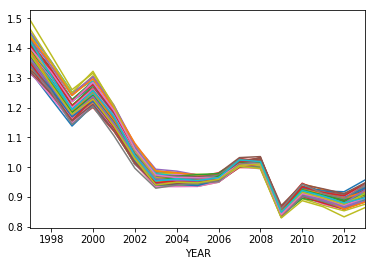

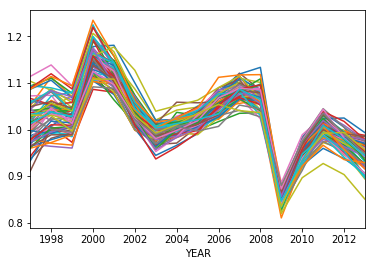

In [9]:
result.loc[[0]].T.plot(legend = False)
result.loc[[2]].T.plot(legend = False)
plt.show()

In [11]:
df_
Q = 10
df_['q'] = pd.cut(df_.sum(1).cumsum(), Q, labels = range(Q))

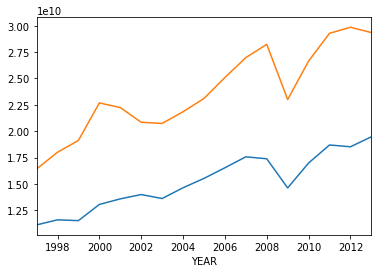

In [39]:
q = 2
half_bin_n = int(df_.q.value_counts().loc[[q]].values[0]/2)
df_.loc[df_.q == q].iloc[:half_bin_n].sum().iloc[:-1].plot()
df_.loc[df_.q == q].iloc[-half_bin_n:].sum().iloc[:-1].plot()

In [40]:
demedianed_log10 = np.log10(result/pd.concat(n*[result.groupby(level = 0).median()]))
var_nq = pd.concat([demedianed_log10.var(1), nq], axis = 1); var_nq.columns = ['var', 'nq']

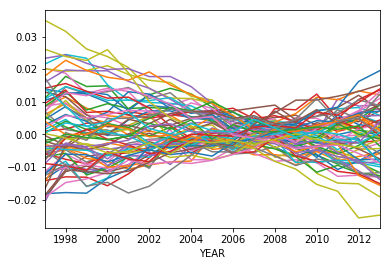

In [41]:
demedianed_log10.loc[[0]].T.plot(legend = False)

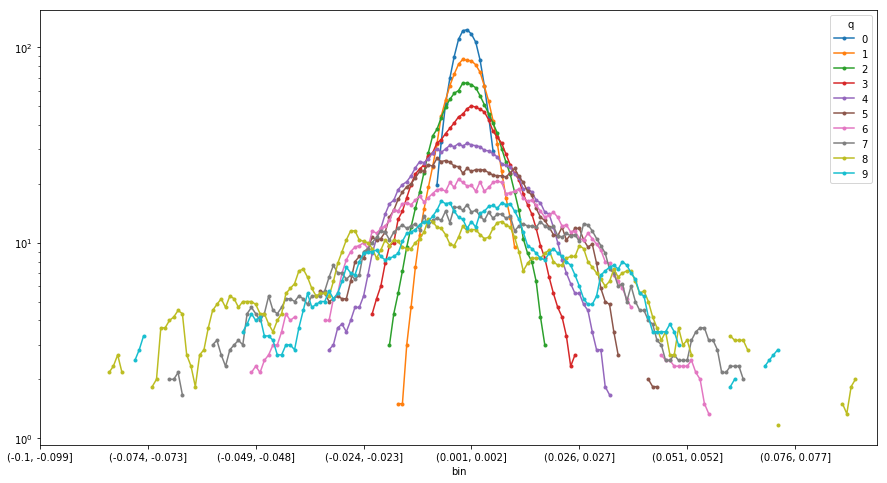

In [42]:
# quantile shocks

qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))

qshocks_hist = pd.DataFrame(qshocks.groupby(['bin', 'q']).size().unstack())

qshocks_hist.rolling(6, center = True).mean().plot(figsize = (15, 8), marker = '.')
plt.yscale('log')

In [43]:
# median = result.groupby(level = 0).median()

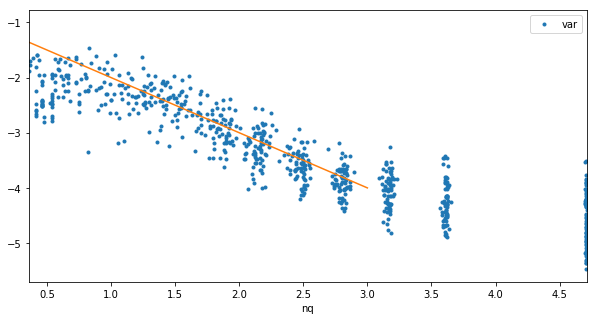

In [44]:
fig, ax = plt.subplots(1, figsize = (10, 5))

np.log10(var_nq).plot(x = 'nq', y = 'var', marker = '.', lw = 0, ax = ax)
plt.plot(np.arange(4), -np.arange(4)-1)
plt.show()

### Background for all quantiles

In [ ]:
# 

Bootstrap, take out the tendency of quantiles. 
divide and take logs. 

In the end, I will take a common line for all the bs median tendencies. Look at this covariance matrix.

In [98]:
n = 25
out = []

for m in range(n):
    df_bs = df_.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    Q = 10
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    nq = df_bs.groupby('q').count().mean(1)
    df_bs = df_bs.groupby('q').sum()
    df_bs['m'] = m
    
    out += [df_bs]

#     common_trend_m = df_bs.median()
    
    
#     x = np.log10(common_trend).index.astype(int).values
#     y = np.log10(common_trend).values
#     z = np.polyfit(x, y, 1); p = np.poly1d(z);
#     exp_curve = np.power(10, p(x))

#     df_bs = df_bs/common_trend

bs_result = pd.concat(out)

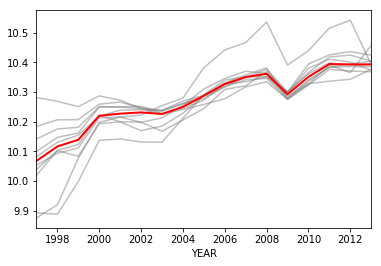

In [107]:
medians = bs_result.groupby(level = 0).median().drop('m', axis = 1)
fig, ax = plt.subplots(1)

np.log10(medians).T.plot(c = '.5', alpha = .5, ax = ax, legend = False)
np.log10(medians).median().plot(c = 'r', ax = ax, lw = 2)
plt.show()

## Fluctuation around bootstrap tendency for the first 4 quantiles.

In [45]:
import numpy as np
bs_list = []
bs_cov = []

for m in range(50):
    df_bs = df_.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    Q = 10
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    df_bs = df_bs.groupby('q').sum()
    df_bs['sample'] = m
    
#     common_trend = df_bs.median()
    
#     x = np.log10(common_trend).index.astype(int).values
#     y = np.log10(common_trend).values
#     z = np.polyfit(x, y, 1); p = np.poly1d(z);
#     exp_curve = np.power(10, p(x))

#     df_bs = df_bs/common_trend
# #     df_bs = df_bs/exp_curve
#     aggshocks = common_trend/exp_curve
#     df_bs = pd.concat([pd.DataFrame(aggshocks, columns = ['shocks']).T, df_bs])
#     df_bs = pd.concat([pd.DataFrame(exp_curve, columns = ['line'], index = df_bs.columns).T, df_bs])

    bs_list += [df_bs]
#     bs_cov += [np.log10(df_bs).T.cov().unstack()]

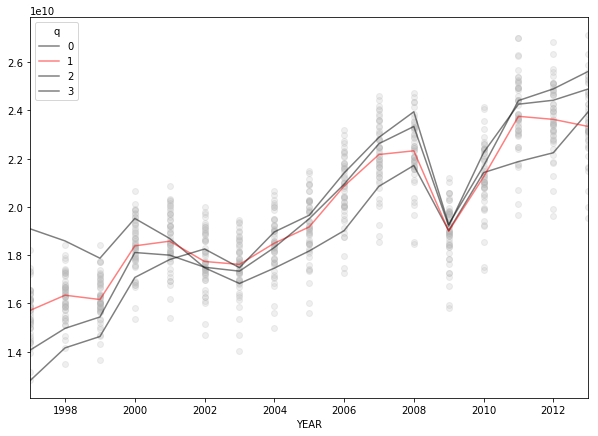

In [46]:
result = pd.concat(bs_list)
median = result.groupby(level = 0).median()

# result.loc[[0]].div(median.loc[[0]].values)

fig, ax = plt.subplots(1, figsize = (10, 7))

result.loc[[1]].iloc[:, :-1].T.plot(marker = 'o', lw = 0, c = '.7', alpha = .2, ax = ax, legend = False)
median.loc[[0]].iloc[:, :-1].T.plot(c = 'k', alpha = .5, ax = ax)
median.loc[[1]].iloc[:, :-1].T.plot(c = 'r', alpha = .5, ax = ax)
median.loc[[2]].iloc[:, :-1].T.plot(c = 'k', alpha = .5, ax = ax)
median.loc[[3]].iloc[:, :-1].T.plot(c = 'k', alpha = .5, ax = ax)

plt.show()

## Covariance in the actual partition

In [214]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

In [269]:
## SELECT IMPORT - EXPORT
df_ = df.loc[df.IMPORT == 0].set_index(['ID', 'YEAR']).unstack()['VART']
df_ = df_.loc[df_.sum(1).sort_values().index]

In [270]:
import numpy as np

df_q = df_.copy()

Q = 10
df_q
df_q['q'] = pd.cut(df_q.sum(1).cumsum(), Q, labels = range(Q))
df_q = df_q.groupby('q').sum()

####
n = 50
out = []

for m in range(n):
    df_bs = 2*df_.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    Q = 10
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    nq = df_bs.groupby('q').count().mean(1)
    df_bs = df_bs.groupby('q').sum()
    df_bs['m'] = m
    
    out += [df_bs]
bs_result = pd.concat(out)

medians = bs_result.groupby(level = 0).median().drop('m', axis = 1)

common_trend = medians.median()

#     common_trend = df_bs.median()

####

x = np.log10(common_trend).index.astype(int).values
y = np.log10(common_trend).values
z = np.polyfit(x, y, 1); p = np.poly1d(z);
exp_curve = np.power(10, p(x))

df_q = df_q/common_trend
#     df_bs = df_bs/exp_curve
aggshocks = common_trend/exp_curve
df_q = pd.concat([pd.DataFrame(aggshocks, columns = ['shocks']).T, df_q])
df_q = pd.concat([pd.DataFrame(exp_curve, columns = ['line'], index = df_q.columns).T, df_q])

s = np.log10(df_q).T.cov().round(4)
s.style.background_gradient(cmap=cm)

,line,shocks,0,1,2,3,4,5,6,7,8,9
line,0.0047,-0,-0.0042,-0.0024,-0.0017,-0.0005,-0.0002,0.0034,-0.0014,0.0032,-0.0007,0.003
shocks,-0,0.001,-0.001,-0.0005,-0.0004,-0.0004,-0.0001,-0.0001,0.0005,-0.0003,0.001,-0.0005
0,-0.0042,-0.001,0.0055,0.0032,0.0023,0.0009,0.0004,-0.0028,0.0004,-0.0027,-0.0012,-0.0021
1,-0.0024,-0.0005,0.0032,0.0019,0.0014,0.0005,0.0003,-0.0016,0.0002,-0.0015,-0.0008,-0.0011
2,-0.0017,-0.0004,0.0023,0.0014,0.001,0.0004,0.0002,-0.0011,0.0002,-0.0011,-0.0006,-0.0008
3,-0.0005,-0.0004,0.0009,0.0005,0.0004,0.0003,0,-0.0003,-0,-0.0003,-0.0002,-0.0002
4,-0.0002,-0.0001,0.0004,0.0003,0.0002,0,0.0003,-0,-0.0004,0,-0.0001,0.0001
5,0.0034,-0.0001,-0.0028,-0.0016,-0.0011,-0.0003,-0,0.0031,-0.0011,0.0024,-0.0006,0.0027
6,-0.0014,0.0005,0.0004,0.0002,0.0002,-0,-0.0004,-0.0011,0.0018,-0.0011,0.0008,-0.0009
7,0.0032,-0.0003,-0.0027,-0.0015,-0.0011,-0.0003,0,0.0024,-0.0011,0.0026,-0.0009,0.0024


In [271]:
np.log10(df_.sum()).var()

0.0050679984429212845

In [272]:
np.log10(df_.sum()).var()

0.0050679984429212845

In [273]:
# df_.sum() == (df_q.loc[range(Q)]*df_q.loc['line']*df_q.loc['shocks']).sum()

In [274]:
quantiles = df_q.loc[range(Q)].sum()
line = df_q.loc['line']
shocks = df_q.loc['shocks']

# np.log10(pd.concat([line, shocks, quantiles], axis = 1)).cov()#.round(6)*1e5
s = np.log10(pd.concat([line, shocks, quantiles], axis = 1)).cov().round(6)*1e5
print(s.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   line &  shocks &     0 \\
\midrule
line   &  466.3 &    -0.0 & -17.1 \\
shocks &   -0.0 &   104.4 & -21.7 \\
0      &  -17.1 &   -21.7 &  13.7 \\
\bottomrule
\end{tabular}



In [275]:
np.log10(df_q).T.cov().round(6)*1e5

,line,shocks,0,1,2,3,4,5,6,7,8,9
line,466.3,-0.0,-422.7,-241.6,-172.7,-50.9,-17.9,343.4,-138.9,324.7,-67.8,298.0
shocks,-0.0,104.4,-96.6,-52.7,-42.1,-35.6,-14.6,-11.5,52.6,-28.9,103.8,-45.2
0,-422.7,-96.6,550.9,321.5,230.9,87.6,40.6,-283.7,41.7,-268.0,-122.6,-207.5
1,-241.6,-52.7,321.5,191.5,136.1,49.5,26.7,-155.5,24.7,-148.6,-80.8,-107.8
2,-172.7,-42.1,230.9,136.1,101.5,42.4,15.2,-111.3,18.3,-107.8,-58.1,-82.8
3,-50.9,-35.6,87.6,49.5,42.4,30.8,3.4,-26.0,-2.5,-28.1,-24.1,-24.2
4,-17.9,-14.6,40.6,26.7,15.2,3.4,34.3,-3.8,-37.8,4.3,-10.0,5.9
5,343.4,-11.5,-283.7,-155.5,-111.3,-26.0,-3.8,309.7,-113.9,244.0,-57.6,267.1
6,-138.9,52.6,41.7,24.7,18.3,-2.5,-37.8,-113.9,180.4,-114.5,82.2,-94.0
7,324.7,-28.9,-268.0,-148.6,-107.8,-28.1,4.3,244.0,-114.5,257.1,-87.8,241.8


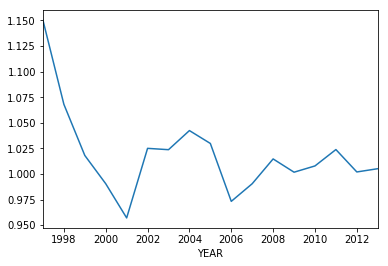

In [276]:
df_q.loc[3].plot()

In [277]:
data = (np.log10(df_q).T - np.log10(df_q).mean(1)).T
covs = (data.T/data.std(1)).T.T.cov().values

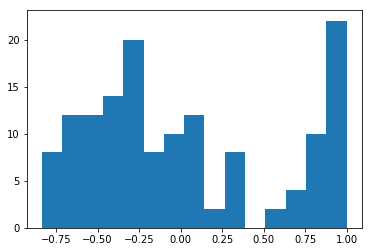

In [278]:
plt.hist(covs.flatten(), 15)
plt.show()

In [279]:
std_ = np.log10(df_q).std(1)
sigmas = np.outer(std_, std_)

out = np.multiply(sigmas, covs)

s = pd.DataFrame(out).round(5)*1e4
s.style.background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,46.6,-0,-42.3,-24.2,-17.3,-5.1,-1.8,34.3,-13.9,32.5,-6.8,29.8
1,-0,10.4,-9.7,-5.3,-4.2,-3.6,-1.5,-1.1,5.3,-2.9,10.4,-4.5
2,-42.3,-9.7,55.1,32.1,23.1,8.8,4.1,-28.4,4.2,-26.8,-12.3,-20.8
3,-24.2,-5.3,32.1,19.1,13.6,5,2.7,-15.5,2.5,-14.9,-8.1,-10.8
4,-17.3,-4.2,23.1,13.6,10.2,4.2,1.5,-11.1,1.8,-10.8,-5.8,-8.3
5,-5.1,-3.6,8.8,5,4.2,3.1,0.3,-2.6,-0.2,-2.8,-2.4,-2.4
6,-1.8,-1.5,4.1,2.7,1.5,0.3,3.4,-0.4,-3.8,0.4,-1,0.6
7,34.3,-1.1,-28.4,-15.5,-11.1,-2.6,-0.4,31,-11.4,24.4,-5.8,26.7
8,-13.9,5.3,4.2,2.5,1.8,-0.2,-3.8,-11.4,18,-11.5,8.2,-9.4
9,32.5,-2.9,-26.8,-14.9,-10.8,-2.8,0.4,24.4,-11.5,25.7,-8.8,24.2


In [280]:
## Ok, cov(eps, eps) seem to be uniform between -1, 1. But is there a relation between magnitude of cov(eps, eps) and sigmas?
# It seems there isn't
# plt.plot(abs(covs).mean(1))

#  So, the row (col) sums tell us the importance of qs. 

contrib_i = pd.DataFrame(out).iloc[2:, 2:].sum(0).reset_index(drop = True)
sigma_i = std_.iloc[2:]
moment_factor = contrib_i/sigma_i

In [283]:
contrib_i.describe()

count    10.000000
mean      0.001041
std       0.001564
min      -0.001738
25%       0.000117
50%       0.000938
75%       0.001754
max       0.003913
dtype: float64

In [284]:
sigma_i.describe()

count    10.000000
mean      0.044944
std       0.018089
min       0.017558
25%       0.034515
50%       0.047228
75%       0.055790
max       0.074225
dtype: float64

## Covariance in bootstrap

In [61]:
import numpy as np
bs_list = []
bs_cov = []
cr_eps_list = []

for m in range(30):
    df_bs = df_.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    Q = 10
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    df_bs = df_bs.groupby('q').sum()
    
    common_trend = df_bs.median()
    
    x = np.log10(common_trend).index.astype(int).values
    y = np.log10(common_trend).values
    z = np.polyfit(x, y, 1); p = np.poly1d(z);
    exp_curve = np.power(10, p(x))

    df_bs = df_bs/common_trend
#     df_bs = df_bs/exp_curve
    aggshocks = common_trend/exp_curve
    df_bs = pd.concat([pd.DataFrame(aggshocks, columns = ['shocks']).T, df_bs])
    df_bs = pd.concat([pd.DataFrame(exp_curve, columns = ['line'], index = df_bs.columns).T, df_bs])

    bs_list += [df_bs]
    bs_cov += [np.log10(df_bs).T.cov().unstack()]
    
    
    demnd = (np.log10(df_bs).T - np.log10(df_bs).mean(1)).T
    cross_eps = (demnd.T/demnd.std(1)).T.T.cov().unstack()
    cr_eps_list += [cross_eps]

In [62]:
cross_eps_out = pd.concat(cr_eps_list, axis = 1)#*1e-18

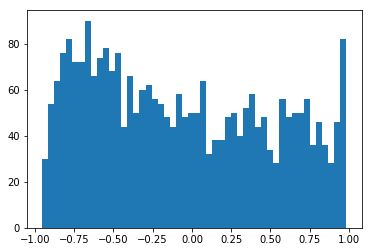

In [79]:
cross_eps_qq = cross_eps_out.loc[~(cross_eps_out.index.get_level_values(0).isin(['line', 'shocks']) | cross_eps_out.index.get_level_values(1).isin(['line', 'shocks']))]
plt.hist(cross_eps_qq.stack().loc[cross_eps_qq.stack() < .99], 50)
plt.show()

# data = cross_eps_qq.copy()

# data['label'] = list(zip(data.index.get_level_values(0), data.index.get_level_values(1)))
# data['hue'] = data.index.get_level_values(0) == data.index.get_level_values(1)
# data = pd.DataFrame(data.set_index(['label', 'hue']).stack(), columns = ['cov']).reset_index()

# fig, ax = plt.subplots(1, figsize = (30, 10))
# ax = sns.boxplot(x='label', y='cov', hue = 'hue', data=data, linewidth = 0.2)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# [plt.axvline(l, c = '.5', linestyle = '--') for l in np.arange(0, (Q + 2)* (Q + 2), Q + 2)]
# # plt.ylim(-0.01, 0.1)
# # plt.yscale('log')
# plt.show()



In [510]:
result = pd.concat(bs_cov, axis = 1)#*1e-18

In [512]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [513]:
s = result.T.describe().loc['mean'].unstack().round(6)*1e4
s.style.background_gradient(cmap=cm)

,line,shocks,0,1,2,3,4,5,6,7,8,9
line,78.2,-0,-50.24,-30.08,-16,-2.6,-4.16,21.28,30.19,32.44,59.81,90.63
shocks,-0,10.34,-9.01,-4.41,-2.56,-0.8,-1.76,1.34,-0.97,-0.75,10.26,17.41
0,-50.24,-9.01,48.56,26.28,14.64,1.99,4.94,-16.5,-17.54,-17.17,-52.87,-90.26
1,-30.08,-4.41,26.28,15.82,8.7,1.8,2.91,-9.49,-10.58,-12.05,-30.35,-46.95
2,-16,-2.56,14.64,8.7,5.81,1.4,1.44,-5.34,-5.22,-6,-16.46,-25.55
3,-2.6,-0.8,1.99,1.8,1.4,2.99,-0.16,-0.99,-1.15,-2.82,-3.75,0.18
4,-4.16,-1.76,4.94,2.91,1.44,-0.16,5.03,-3.45,-2.05,-3.84,-6.23,-10.56
5,21.28,1.34,-16.5,-9.49,-5.34,-0.99,-3.45,14.51,6.6,7.6,21.52,30.79
6,30.19,-0.97,-17.54,-10.58,-5.22,-1.15,-2.05,6.6,28.45,8.1,14.33,33.77
7,32.44,-0.75,-17.17,-12.05,-6,-2.82,-3.84,7.6,8.1,53.79,26.93,20.08


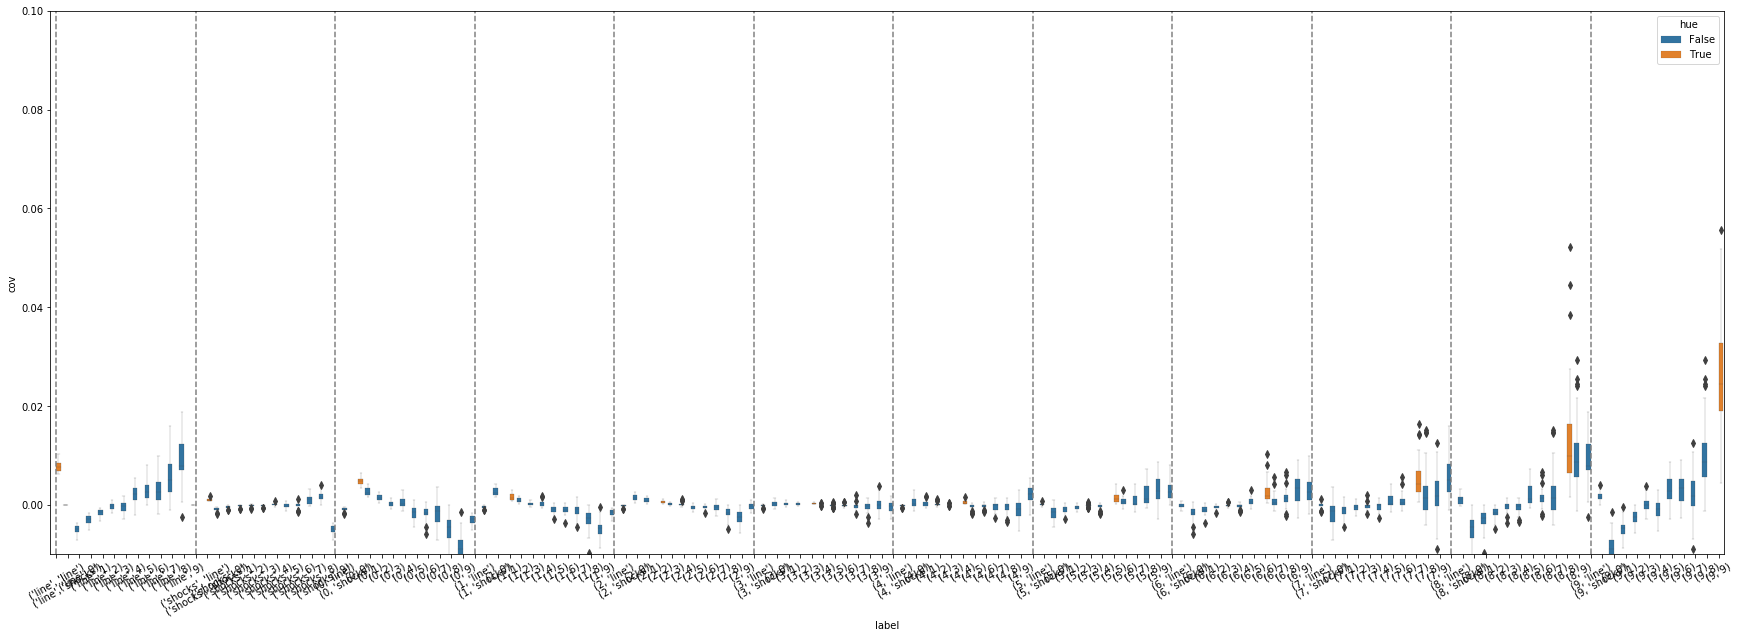

In [516]:
data = result.copy()

data['label'] = list(zip(data.index.get_level_values(0), data.index.get_level_values(1)))
data['hue'] = data.index.get_level_values(0) == data.index.get_level_values(1)
data = pd.DataFrame(data.set_index(['label', 'hue']).stack(), columns = ['cov']).reset_index()

fig, ax = plt.subplots(1, figsize = (30, 10))
ax = sns.boxplot(x='label', y='cov', hue = 'hue', data=data, linewidth = 0.2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
[plt.axvline(l, c = '.5', linestyle = '--') for l in np.arange(0, (Q + 2)* (Q + 2), Q + 2)]
plt.ylim(-0.01, 0.1)
# plt.yscale('log')
plt.show()
# hue

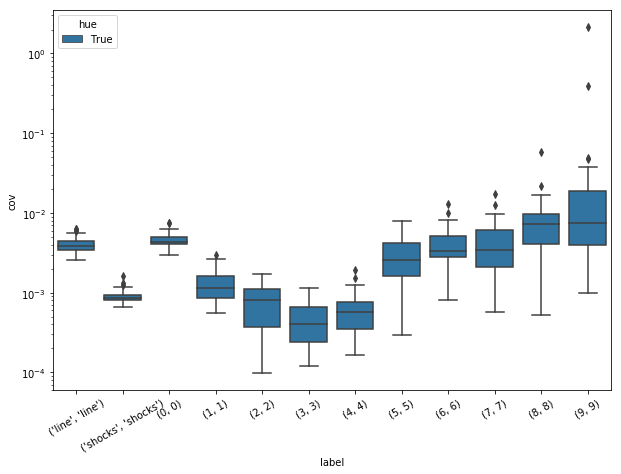

In [352]:
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(x='label', y='cov', hue = 'hue', data=data.loc[data.hue == True])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# ax.set_ylim(0, 0.025)
ax.set_yscale('log')
plt.show()

In [353]:
s = result.T.describe().loc['std'].unstack().round(6)*1e4
s.style.background_gradient(cmap=cm)

,line,shocks,0,1,2,3,4,5,6,7,8,9
line,9.78,0,9.25,7.57,6.74,7.73,9.44,13.91,25.8,27.78,37.66,133.19
shocks,0,2.1,2.47,1.89,2.05,1.54,1.62,3,3.97,3.61,4.65,24.27
0,9.25,2.47,10.54,8.28,7.96,7.85,9.91,12.71,23.52,24.32,34.18,163.65
1,7.57,1.89,8.28,6.28,4.78,4.55,5.26,7.16,11.25,13.37,15.72,82.07
2,6.74,2.05,7.96,4.78,4.89,2.79,3.99,4.83,9.52,8.04,11.26,73.94
3,7.73,1.54,7.85,4.55,2.79,2.88,2.11,6.84,4.33,8.28,11.65,15.6
4,9.44,1.62,9.91,5.26,3.99,2.11,4.12,6.73,7.09,8.01,11.11,54.45
5,13.91,3,12.71,7.16,4.83,6.84,6.73,19.56,18.44,22.52,28.79,111.33
6,25.8,3.97,23.52,11.25,9.52,4.33,7.09,18.44,26.27,22.94,34.74,67.59
7,27.78,3.61,24.32,13.37,8.04,8.28,8.01,22.52,22.94,37.37,40.8,155.78


In [151]:
s = result.T.describe().loc['50%'].unstack().round(6)*1e4
s.style.background_gradient(cmap=cm)

,trend,0,1,2,3,4,5,6,7,8,9
trend,44.13,2.6,1.39,1.62,7.05,-2.04,-0.22,3.8,-11.47,-2.53,2.58
0,2.6,27.09,-0.44,-1.58,0.15,-3.26,-1.4,-3.96,-1.83,-7.26,0.68
1,1.39,-0.44,13.7,-1.77,-0.83,-1.62,-0.22,-2.71,-0.83,0.2,-4.27
2,1.62,-1.58,-1.77,22.93,-2.27,-0.09,-2.56,-1.84,-0.79,-2.85,-0.15
3,7.05,0.15,-0.83,-2.27,23.12,-3.98,0.89,4.12,-8.94,0.16,-9.55
4,-2.04,-3.26,-1.62,-0.09,-3.98,20.8,-0.86,-2.36,4.65,-0.37,0.26
5,-0.22,-1.4,-0.22,-2.56,0.89,-0.86,12.73,0.43,-2.3,0.2,-1.3
6,3.8,-3.96,-2.71,-1.84,4.12,-2.36,0.43,24.14,-0.89,-3.09,-3.43
7,-11.47,-1.83,-0.83,-0.79,-8.94,4.65,-2.3,-0.89,33.04,-0.64,0.78
8,-2.53,-7.26,0.2,-2.85,0.16,-0.37,0.2,-3.09,-0.64,20.28,-2.85
